In [1]:
##############################
#Standard & Poor 500 EDA     #
#Maintainer: Christopher Chan#
#Version: 0.0.1              #
#Date: 2023-01-20            #
##############################

import os, sys, re
import statsmodels
import scipy
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from datetime import date, datetime


%matplotlib inline

data_dir = os.path.abspath("../data")
sp500_df = pd.read_csv(os.path.join(data_dir, "raw", "SP_500","sp500_stocks.csv"), sep = ",")
sp500_comp_df = pd.read_csv(os.path.join(data_dir, "raw", "SP_500", "sp500_companies.csv"), sep = ",")

sp500_df = pd.merge(sp500_df, sp500_comp_df, on = "Symbol", how = "inner")

sp500_df["Date"] = sp500_df["Date"].str.replace(r"\s.+", "", regex = True)
sp500_df["Date"] = pd.to_datetime(sp500_df["Date"], yearfirst = True, errors = "raise")

# Set Datetype

uniq_count = len(sp500_df["Symbol"].unique())
print(f"There are {uniq_count} unique companies")

sp500_df.sample(n = 5)

There are 495 unique companies


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
826384,2018-05-08,ICE,66.921898,70.070000,70.629997,69.570000,70.440002,2595800.0,NYQ,Intercontinental Exchange Inc.,...,106.92,60239159296,4.552000e+09,0.063,Atlanta,GA,United States,8936.0,"Intercontinental Exchange, Inc., together with...",0.001733
109892,2016-01-19,AMT,80.805443,90.910004,93.529999,89.599998,89.760002,4084300.0,NYQ,American Tower Corporation (REI,...,223.35,103993106432,6.350300e+09,0.088,Boston,MA,United States,6378.0,"American Tower Corporation, one of the largest...",0.002991
398060,2012-10-05,CMA,24.709738,31.799999,32.139999,31.620001,31.889999,2132700.0,NYQ,Comerica Incorporated,...,69.84,9145687040,NaN,0.201,Dallas,TX,United States,7432.0,"Comerica Incorporated, through its subsidiarie...",0.000263
401974,2015-04-13,CAG,24.244196,29.260700,29.548637,29.237354,29.361868,2132972.0,NYQ,"ConAgra Brands, Inc.",...,38.27,18240325632,2.136200e+09,0.083,Chicago,IL,United States,18000.0,"Conagra Brands, Inc., together with its subsid...",0.000525
61132,2018-01-11,ALGN,252.910004,252.910004,253.199997,246.009995,248.000000,722400.0,NMS,"Align Technology, Inc.",...,236.30,18457960448,8.725100e+08,-0.124,Tempe,AZ,United States,23800.0,"Align Technology, Inc., a medical device compa...",0.000531


## Mission
1. Explore different timeseries for different industries
2. Explore Decomposed timeseries for selected industries
3. Generate Research Question from Exploratory Data Analysis!

### Let's subset for SECTOR: Financial Services

In [2]:
sp500_fin = sp500_df[sp500_df["Sector"] == "Financial Services"]

sp500_fin.sort_values(by = ["Ebitda"], ascending = False)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
108370,2023-01-18,AIG,62.209999,62.209999,64.029999,62.130001,63.700001,3565300.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
106177,2014-05-02,AIG,43.663116,52.349998,53.299999,52.189999,52.970001,8452800.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
106187,2014-05-16,AIG,43.788223,52.500000,52.910000,52.029999,52.910000,7414000.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
106186,2014-05-15,AIG,44.088478,52.860001,53.570000,52.240002,53.279999,8794100.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
106185,2014-05-14,AIG,44.530548,53.389999,54.000000,53.150002,53.939999,5728800.0,NYQ,"American International Group, I",...,61.72,45856722944,2.355100e+10,0.146,New York,NY,United States,36600.0,"American International Group, Inc. offers insu...",0.001319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622291,2023-01-12,ZION,51.450001,51.450001,52.259998,51.389999,51.580002,1295200.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223
1622292,2023-01-13,ZION,51.389999,51.389999,51.439999,49.650002,50.680000,1018700.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223
1622293,2023-01-17,ZION,50.860001,50.860001,51.220001,50.320000,51.150002,1674600.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223
1622294,2023-01-18,ZION,48.259998,48.259998,50.580002,48.200001,50.549999,1804500.0,NMS,Zions Bancorporation N.A.,...,49.52,7748048384,NaN,0.023,Salt Lake City,UT,United States,9920.0,"Zions Bancorporation, National Association pro...",0.000223


In [3]:
sp500_fin.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

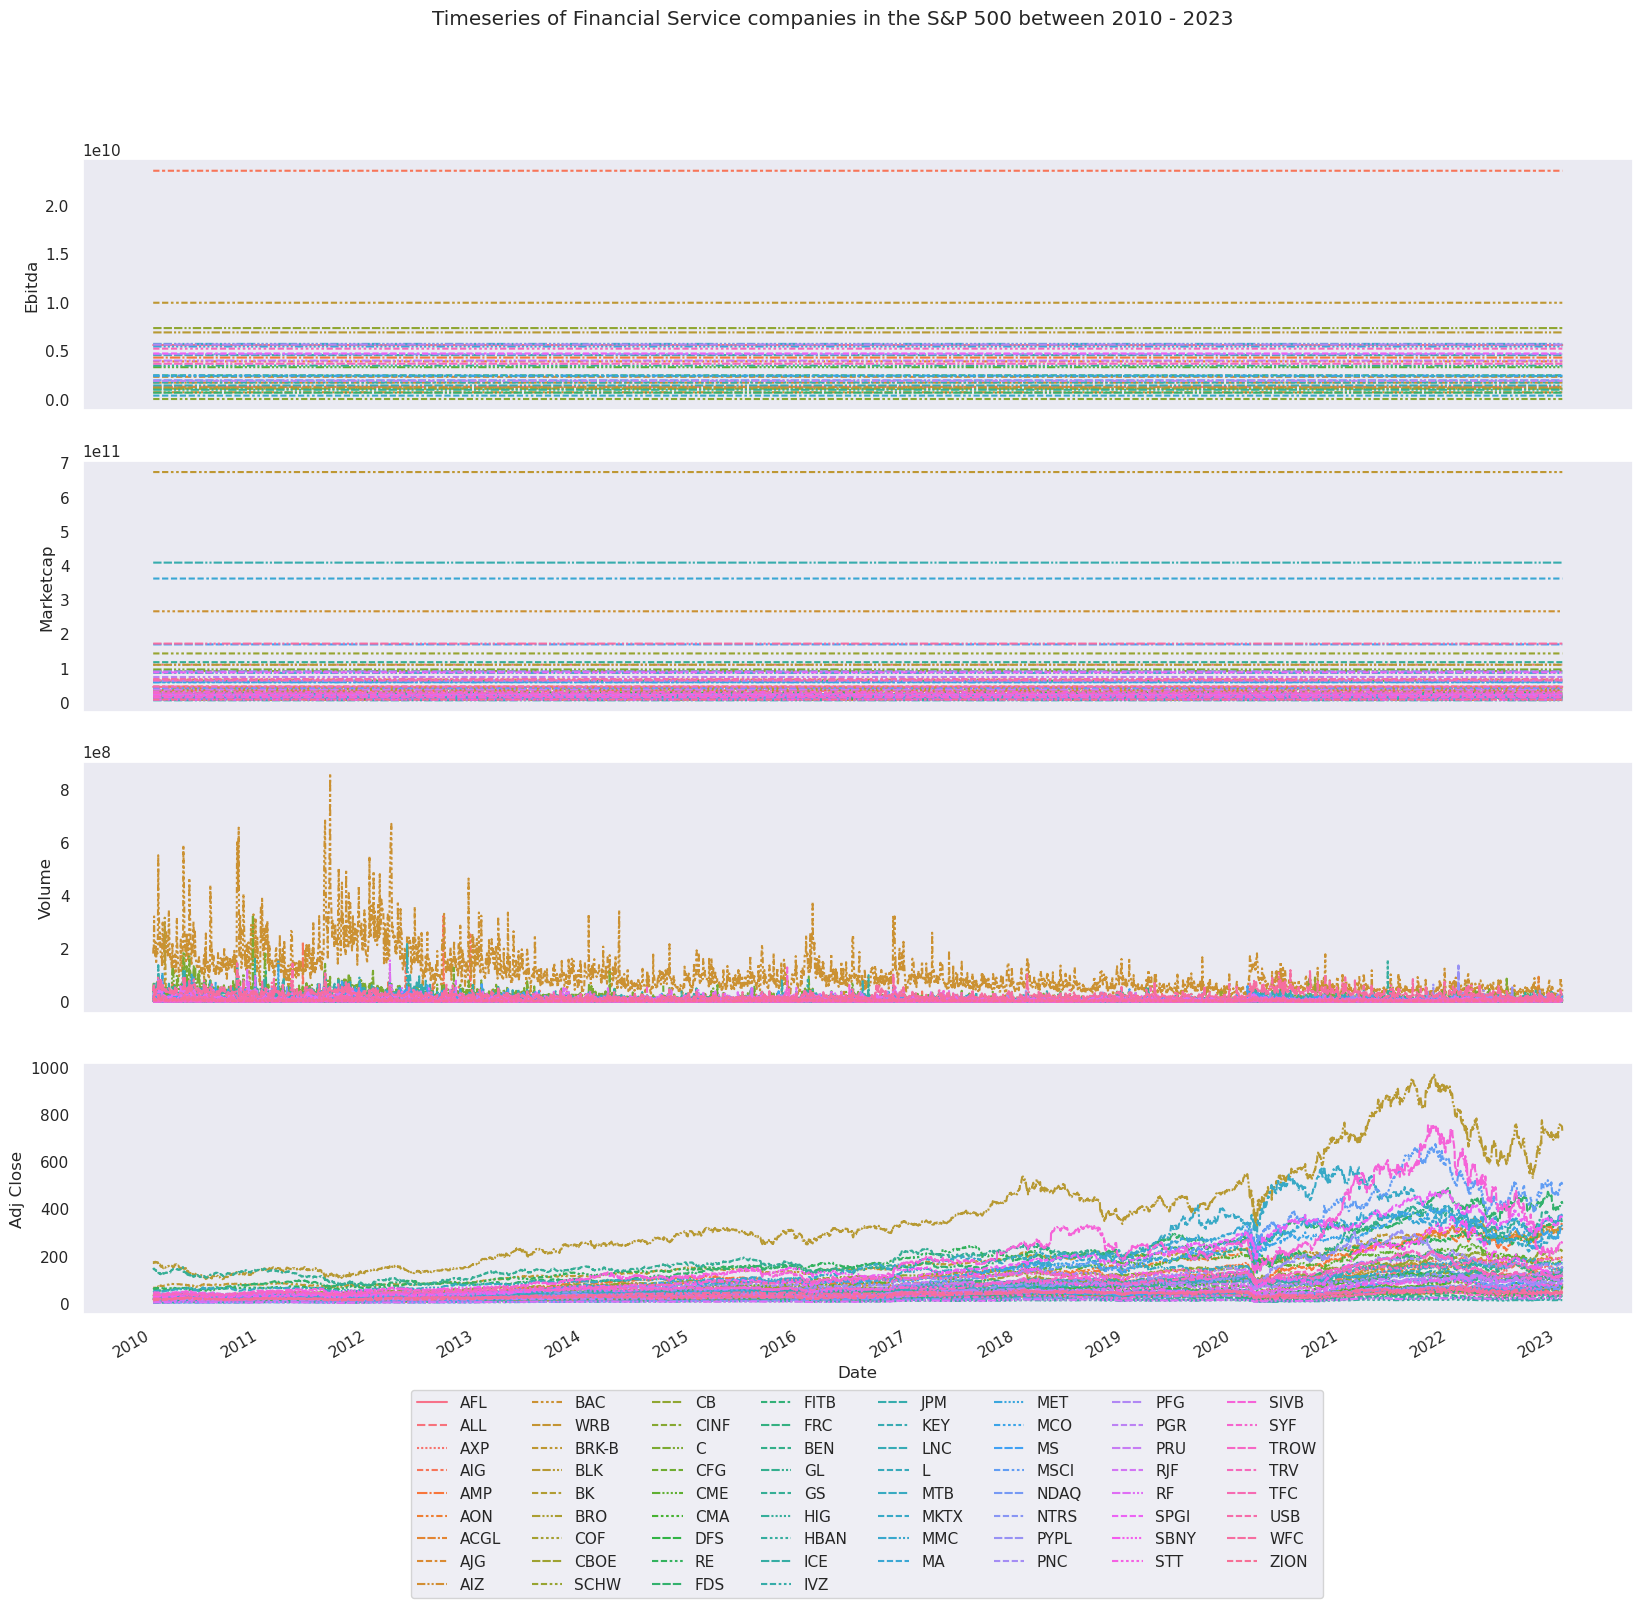

<Figure size 640x480 with 0 Axes>

In [153]:
sns.set_theme(context = "notebook", style = "darkgrid", palette = "pastel")

fig, axes = plt.subplots(4, 1, figsize = (20, 15), sharex = True)
fig.suptitle("Timeseries of Financial Service companies in the S&P 500 between 2010 - 2023")

EBIDTA_time = sns.lineplot(data = sp500_fin, x = "Date", y = "Ebitda", ax = axes[0],
                           hue = sp500_fin["Symbol"], style = sp500_fin["Symbol"], legend = False)

CAP_time = sns.lineplot(data = sp500_fin, x = "Date", y = "Marketcap", ax = axes[1],
                        hue = sp500_fin["Symbol"], style = sp500_fin["Symbol"], legend = False)

Volume_time = sns.lineplot(data = sp500_fin, x = "Date", y = "Volume", ax = axes[2],
                           hue = sp500_fin["Symbol"], style = sp500_fin["Symbol"], legend = False)

AClose_time = sns.lineplot(data = sp500_fin, x = "Date", y = "Adj Close", ax = axes[3],
                           hue = sp500_fin["Symbol"], style = sp500_fin["Symbol"], legend = True)

axes[3].legend(bbox_to_anchor = (.8, -0.3), borderaxespad = 0, ncol = 8)

for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.grid()
    for label in ax.get_xticklabels(which = 'major'):
        label.set(rotation = 30, horizontalalignment = 'right')
    
plt.show()

plt.savefig("../reports/figures/Timeseries_s&p500.png", format = "png", bbox_inches = "tight")